Sensitivity to Initial Conditions aka The Butterfly Effect

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Comparing Two Trajectories Visually

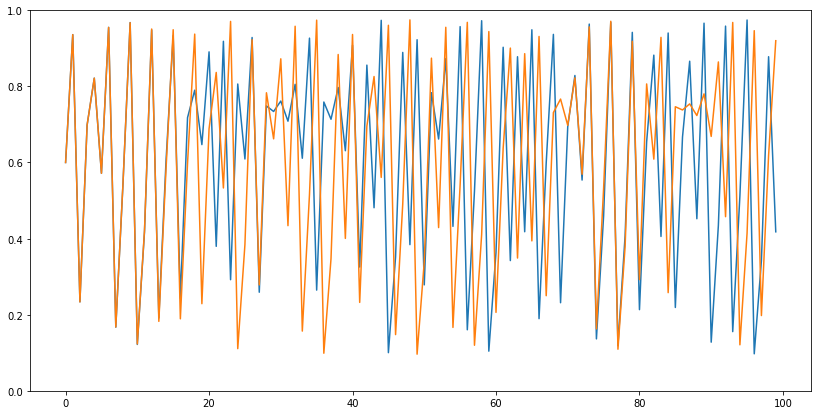

In [4]:
nsteps = 100              # Number of steps in our lil simulation
x = np.zeros(nsteps)      # Number of animals at every step
starting_points = [0.600, 0.60001] #slight difference in starting point and as you go farther in the future, there is chaos

fig = plt.figure(figsize=(14,7))
for x[0] in starting_points:
    r = 3.9                   # Rate of population change (growth - die-out?) -- most chaotic

    for i in range(1,nsteps):
        x[i] = r*x[i-1]*(1-x[i-1]) #A loop within a loop: this equation tends to increase distance between points, but also "folds in on itself" like the chaotic horseshoe

    plt.plot(x);
plt.ylim((0,1)); # Force y axis to be between 0 and 1

#This is a good metaphor for the butterfly effect because it shows how slight change (diff. in starting points) chaotically (?) effect future
#Homework was to show how long it takes before the trajectory deviates


#Instead of fancy SDs (in the next one), we'll look at absolute value of the difference
#Starting points slightly apart, then 


#For each time point, (i), x[i] = r*x[i-1]*(1-x[i-1]) -- we'll put this loop inside a different loop
#For two curves in a pair, x[0] = either x[start] or x[start] + lil wiggle aka (tiny little bit of offest)

# put all of this in an even larger loop! we probably want to repeat it in a larger loop -- and then put this in an even larger loop



#so...
#for each r:
#  for each trial
#  set the x[start] (random)
#  for two curves in a pair: 
#     x[0] = either x[start] or x[start] + lil wiggle aka (tiny little bit of offest)
#     for each time point (i)
#         x[i] = r*x[i-1]*(1-x[i-1]) *Need to remember both vectors (values)

#  calculate abs(x - other x)  *store these values
#the calculate mean of abs(x - other x) #you will have one column of values again, but then the trials will give you many (n)
#plot the mean #then you will have one column of values again (mean of every time point)

Exercise 2. Prediction horizon
Role-playing: Let's say we actually use this equation to predict something.

Q: How far in the future can we reasonably predict?

How to answer this question?

If the question is about time, probably the answer will include a plot that has time as its horizontal axis.
If we have a plot with time as axis, and the question is about prediction quality, then probably the vertical axis should be some kind of prediction quality.
How to measure prediction quality? Option 1: use pairs of trajectories, calculate mean(abs(difference)) for each point in time. Option 2: use a family of trajectories; noisify (wiggle, shake?) the starting point, check how much variance it creates at each of consequtive points.

In [5]:
# 2D arrays
a = np.zeros(shape=(5,2))
a[2,0] = 888 # Addressing one element
print('Entire thingy:\n',a)
print('2nd row:',a[2,:])
print('0th column:',a[:,0])

Entire thingy:
 [[  0.   0.]
 [  0.   0.]
 [888.   0.]
 [  0.   0.]
 [  0.   0.]]
2nd row: [888.   0.]
0th column: [  0.   0. 888.   0.   0.]


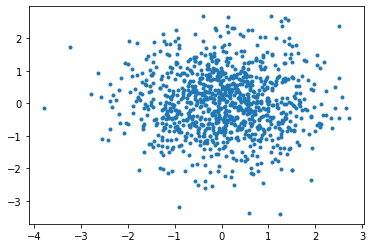

In [6]:
# A check that normal numbers generated by numpy actually look kinda normal
plt.plot(np.random.randn(1000),np.random.randn(1000),'.');
# Yep. Looks like noise should look like.

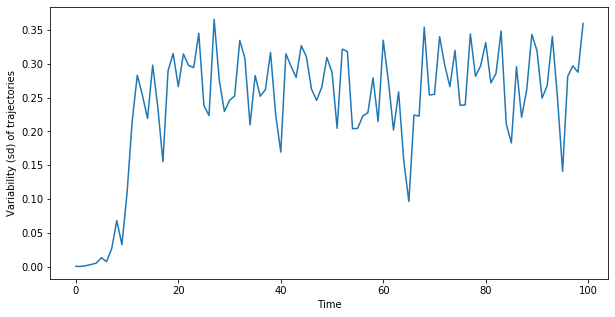

In [7]:
nsteps = 100              # Number of steps in our lil simulation
ntraces = 10              # a bunch of curves
x = np.zeros(shape=(nsteps,ntraces))    # A placeholder for the trajectories we'll generate. Each will be a column.
wiggle = 0.001                          # The standard deviation of the original noise in x0

r = 3.9
for itrace in range(ntraces):
    x[0,itrace] = 0.6+np.random.randn(1)*wiggle  # all the curves start in the same place, then add noise (slightly diff starting points) -- once you get to pont where you can't predict, ponts will be all over place -- so need a measure of tightness (SD)
    for istep in range(1,nsteps):
        x[istep,itrace] = r*x[istep-1,itrace]*(1-x[istep-1,itrace])
    
#fig = plt.figure(figsize=(10,5))
#plt.plot(x)
#plt.ylim((0,1)); # Force y axis to be between 0 and 1
#plt.xlabel('Time');
#plt.ylabel('All trajectories');

fig = plt.figure(figsize=(10,5))
plt.plot(np.std(x,axis=1))    #SD is the measure of tightness of the points
plt.xlabel('Time');
plt.ylabel('Variability (sd) of trajectories');

In [ ]:
#Want a measure of my inability to predict as a funciton of time

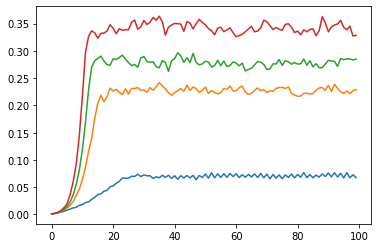

In [47]:
#This is a good metaphor for the butterfly effect because it shows how slight change (diff. in starting points) chaotically (?) effect future
#Homework was to show how long it takes before the trajectory deviates


#Instead of fancy SDs (in the next one), we'll look at absolute value of the difference
#Starting points slightly apart, then 


#For each time point, (i), x[i] = r*x[i-1]*(1-x[i-1]) -- we'll put this loop inside a different loop
#For two curves in a pair, x[0] = either x[start] or x[start] + lil wiggle aka (tiny little bit of offest)

# put all of this in an even larger loop! we probably want to repeat it in a larger loop -- and then put this in an even larger loop



#so...
#for each r:
#  for each trial
#  set the x[start] (random)
#  for two curves in a pair: 
#     x[0] = either x[start] or x[start] + lil wiggle aka (tiny little bit of offest)
#     for each time point (i)
#         x[i] = r*x[i-1]*(1-x[i-1]) *Need to remember both vectors (values)

#  calculate abs(x - other x)  *store these values
#the calculate mean of abs(x - other x) #you will have one column of values again, but then the trials will give you many (n)
#plot the mean #then you will have one column of values again (mean of every time point)



nsteps = 100              # Number of steps in our lil simulation
ntrials = 1000            # a bunch of curves
wiggle = 0.001            # 

x = np.zeros(shape = (nsteps, 2)) 
diff = np.zeros(shape = (nsteps, ntrials))

for r in np.arange(3.6, 4.0, 0.1):        
    for itrial in range(ntrials):
        starting_points = np.random.uniform(low = 0 , high = 1 - wiggle) + np.array([0, wiggle]) #this is setting the random xstart and then adding the array allows for the second vector of values
        for ipair in range(2):       #for two curves in a pair
            x[0, ipair] = starting_points[ipair]     #the initial x is 
            for istep in range(1, nsteps):
                x[istep, ipair] = r*x[istep-1,ipair]*(1-x[istep-1,ipair])
        diff[:, itrial] = np.abs(x[:,1] - x[:,0])
    plt.plot(np.mean(diff, axis = 1))

Extra question (for those who already got the pretty curves of unpredictability as a function of step for different values of r):

Build the actual plot of Predictability Horizon as a function of r. It will have only 1 point for each r, so if we loop through 4 different values of r, we'll get only 4 markers. It will probably start a bit higher (because predictability horizon seems a bit longer for smaller values of r), but then it goes down and remain almost flat. (We know how it looks like from just looking at the pretty curves)

One way to find the horizons is to estimate the "typical" (average?) flat value of each curve, and then find the first point in time when the corresponding curve crosses it for the first time. In other words, the first point at which the unpredictability(time) curve reaches or crosses its typical flat value.

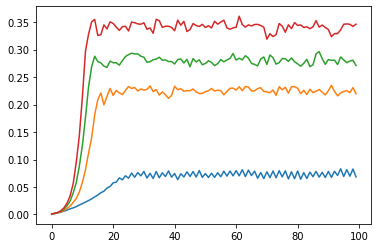

In [48]:
nsteps = 100              # Number of steps in our lil simulation
ntrials = 1000            # a bunch of curves
wiggle = 0.001            # 

x = np.zeros(shape = (nsteps, 2)) #shape = defines the size of the array
diff = np.zeros(shape = (nsteps, ntrials)) #

for r in np.arange(3.6, 4.0, 0.1):        
    for itrial in range(ntrials):
        starting_points = np.random.uniform(low = 0 , high = 1 - wiggle) + np.array([0, wiggle]) #this is setting the random xstart and then adding the array allows for the second vector of values
        for ipair in range(2):       #for two curves in a pair
            x[0, ipair] = starting_points[ipair]     #the initial x is 
            for istep in range(1, nsteps):
                x[istep, ipair] = r*x[istep-1,ipair]*(1-x[istep-1,ipair])
        diff[:, itrial] = np.abs(x[:,1] - x[:,0]) #diff is where we are storing the value
    plt.plot(np.mean(diff, axis = 1))